# YOUR PROJECT TITLE

Imports and set magics:

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

**Consider the following closed form solution of the neoclassical growth model** 

The preferences are given by: $$U_0=\sum^{\infty}_{t=0}(\beta(1+n))^{t}log[c_t]$$
And the resource constraints are given by: $$(1+n)k_{t+1}=k_t^\alpha-c_t$$
$k_0$ is exogenously given. The transversality condition can be expressed as: $$\underset {T\rightarrow\infty}{lim}[k_{T+1}(\beta(1+n))^T\gamma^Tc_T^{-1}]$$
And we have $\beta(1 + n) < 1$

### Equations

The provided model is a so called Ramsey Growth Model, which includes time preferences in consumption optimisation and inter-temporal consumption choices.


The model aims to capture the dynamics of economic growth and the allocation of resources over time in an economy. It provides a framework for understanding how factors such as savings, investment, population growth, and technological progress interact to determine the long-run path of key macroeconomic variables like output, consumption, and capital accumulation.

Preferences Equation ($U_0$):
This equation represents the utility function of the representative agent in the economy. The agent aims to maximize the sum of discounted utility from consumption over an infinite time horizon. The utility function is logarithmic in consumption, implying diminishing marginal utility but a constant elasticity of intertemporal substitution due to the logarithmic form.


Resource Constraints Equation:
This equation reflects the intertemporal budget constraint of the economy. It states that the amount of consumption and investment (represented by $c_t$ and $k_{t+1}$ respectively) cannot exceed the total output of the economy at any given time $t$. Output is a function of the capital stock $k_t$ and is determined by a production function with constant returns to scale and a Cobb-Douglas form ($k_t^\alpha$).


Transversality Condition:
This condition ensures the sustainability of the economic model by asserting that the discounted value of future consumption relative to the value of the capital stock must approach zero as time extends to infinity. It prevents the economy from accumulating excessive levels of debt or capital that cannot be sustained indefinitely.


### Parameters


$\beta$: This represents the discount factor, denoting the preference of consumption today over consumption in the future. It ranges between 0 and 1, where a higher value of $\beta$ indicates a stronger preference for current consumption relative to future consumption.

$n$: This parameter signifies the population growth rate or the growth rate of the labor force. It influences the overall growth rate of the economy and affects the dynamics of capital accumulation.

$c_t$: This denotes consumption at time $t$. It represents the portion of output or income that households consume rather than save. It plays a crucial role in determining the well-being or utility of individuals over time.

$k_t$: This represents the capital stock at time $t$. Capital accumulation, along with technological progress, drives economic growth in the neoclassical growth model. The level of capital influences future production possibilities and thus affects consumption and investment decisions.

$\gamma$: The $\gamma$ here appears in the expression for the transversality condition. It is a scalar that might reflect various factors, such as the elasticity of intertemporal substitution, the rate of time preference, or other structural parameters of the model. It ensures the condition holds as $T$ approaches infinity, ensuring the model's sustainability and consistency over time.

$\alpha$: The $\alpha$ represents the output elasticity of capital in the production function.

## Planners Problem

The planners problem can be stated as the following: $$ \underset {c_t,k_t}{max} U = \sum ^{\infty}_{t=0}(\beta(1+n))^{t}log[c_t]$$
Such that: $$(1+n)k_{t+1}=k_t^\alpha-c_t$$

In the following, we provide the analytical solution to the model.

#### The Bellman Equation


The first step of our dynamic programming treatment is to obtain the Bellman equation. We let $v(x)$ be maximum lifetime utility attainable from the current time when $x$ units of consumption is left: $$v(x)= max \sum ^{\infty}_{t=0}(\beta(1+n))^{t}log[c_t]$$

We do not have an exact expression for $v(k_t)$, but we know that the function will satisfy: $$v(k_t)=\underset {c_t}{max}\{log(c_t)+\beta(1+n)v(k_{t+1}\}$$. That is, the value function is just maximising the utility received from $c$ consumption today, and discounted consumption in the future period. Choosing $c$ optimally means trading off current vs future rewards.

### 

## Numerical solution

In [24]:
ce = CakeEating()

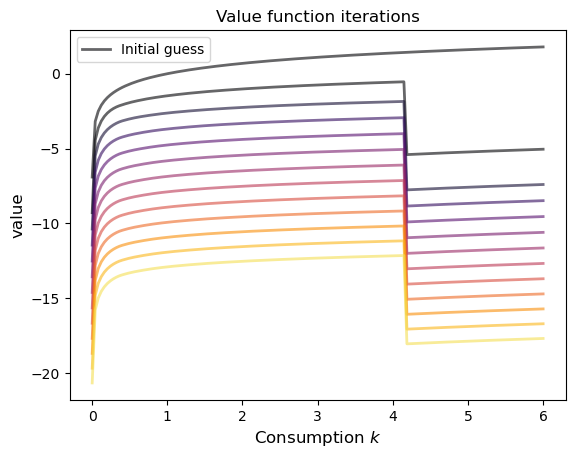

In [25]:
k_grid = ce.k_grid
v = ce.u(k_grid)       # Initial guess
n = 12                 # Number of iterations

fig, ax = plt.subplots()

ax.plot(k_grid, v, color=plt.cm.inferno(0),
        lw=2, alpha=0.6, label='Initial guess')

for i in range(n):
    v = T(v, ce)  # Apply the Bellman operator
    ax.plot(k_grid, v, color=plt.cm.inferno(i / n), lw=2, alpha=0.6)

ax.legend()
ax.set_ylabel('value', fontsize=12)
ax.set_xlabel('Consumption $k$', fontsize=12)
ax.set_title('Value function iterations')

plt.show()

In [26]:
def compute_value_function(ce, tol=1e-4, max_iter=1000, verbose=True, print_skip=25):
    # Set up loop
    v = ce.u(ce.k_grid)  # Use utility as initial guess
    i = 0
    error = tol + 1

    while i < max_iter and error > tol:
        v_new = T(v, ce)
        error = np.max(np.abs(v - v_new))
        i += 1

        if verbose and i % print_skip == 0:
            print(f"Error at iteration {i} is {error}.")

        v = v_new

    if error > tol:
        print("Failed to converge!")
    elif verbose:
        print(f"\nConverged in {i} iterations.")

    return v_new

In [27]:
v = compute_value_function(ce)

Error at iteration 25 is 0.8626083601400225.
Error at iteration 50 is 0.6709551817234498.
Error at iteration 75 is 0.5218833147828619.
Error at iteration 100 is 0.4059320050278217.
Error at iteration 125 is 0.3157425604760391.
Error at iteration 150 is 0.2455913500090645.
Error at iteration 175 is 0.19102619617235916.
Error at iteration 200 is 0.1485842786267142.
Error at iteration 225 is 0.1155720042444699.
Error at iteration 250 is 0.08989435691132996.
Error at iteration 275 is 0.06992179512837993.
Error at iteration 300 is 0.05438663314788528.
Error at iteration 325 is 0.04230308534361882.
Error at iteration 350 is 0.03290428708437787.
Error at iteration 375 is 0.025593645900926276.
Error at iteration 400 is 0.019907326746519516.
Error at iteration 425 is 0.015484357669862447.
Error at iteration 450 is 0.012044062709378522.
Error at iteration 475 is 0.00936816293533127.
Error at iteration 500 is 0.007286721716837974.
Error at iteration 525 is 0.005667771956353818.
Error at iteration

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Conclusion

Add concise conclusion. 